In [2]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [3]:
train_mapper_path = "./datasets/bts_site_b_train/mapper_TrainOnly.csv"
train_file_path =  "./datasets/train/" 

In [4]:
df_mapper = pd.read_csv(train_mapper_path)
df_mapper.head()

,Unnamed: 0,Building,StreamID,Filename,strBrickLabel
0,0,A,9ba955fa_5960_4c9b_b73a_10156da7d083,trainAll_0.pkl,Operating_Mode_Status
1,1,A,7a027f80_7d78_4a88_a1c1_20aaed374d97,FILE NOT SAVED: y is Point.,Point
2,2,A,8fd6e75b_88bc_4992_b420_77389969b3c4,trainAll_1.pkl,Mode_Command
3,3,A,8db6eaa9_bd6c_4f7e_aed0_a47e4e192a6c,trainAll_2.pkl,Active_Power_Sensor
4,4,A,b2338dec_110a_45cc_8358_1171aaef2c45,trainAll_3.pkl,System_Status


In [5]:
df = pd.read_csv('./sensor_location.csv')
df.head()

,ID,StreamID,Type,Category,Unit,NestedRelations,RelationType.1,Entity.EntityID.1,Entity.EntityType.1,Entity.Category.1,...,Entity.EntityType.4,Entity.Category.4,Entity.Depth.4,RelationType.5,Entity.EntityID.5,Entity.EntityType.5,Entity.Category.5,Entity.Depth.5,hasStream,Unnamed: 32
0,08684dc4_48b2_49da_b3cd_9b061c76c4f4,f3628673_839d_4681_9a34_b6374951908f,Current_Sensor,Sensor,A,{'RelatedEntities': [{'RelationType': 'isPoint...,isPointOf,b99ce6df_b057_4d80_81ba_ad76462968c1,Electrical_Generation_Meter,Equipment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,f3628673_839d_4681_9a34_b6374951908f
1,08ff7ae0_acef_4f4d_8328_2de484a6d5e1.080e0472_...,7274bab7_ada3_4c00_8d20_e84a8d33f995,Mode_Status,Point,NaN,{'RelatedEntities': []},NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
2,08ff7ae0_acef_4f4d_8328_2de484a6d5e1.1316fd60_...,6c61a963_a4cf_485d_a15f_13154222a1ae,Heating_Command,Point,NaN,{'RelatedEntities': []},NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
3,08ff7ae0_acef_4f4d_8328_2de484a6d5e1.16fbd00a_...,e022d248_71dc_4142_a4af_01f2eff3360b,Water_Temperature_Sensor,Sensor,NaN,{'RelatedEntities': []},NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
4,08ff7ae0_acef_4f4d_8328_2de484a6d5e1.18999260_...,0c6cb0a3_7b9c_43af_baf5_dcb4ccd6914a,Heating_Command,Point,NaN,{'RelatedEntities': [{'RelationType': 'isPoint...,isPointOf,c10f79c9_744d_40a5_a272_7cde7ca1f5a6,Air_Handler_Unit,Equipment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN


#### Sensor In the Building

In [6]:
df.query("Category=='Sensor'").Type.unique()

array(['Current_Sensor', 'Water_Temperature_Sensor',
       'Heating_Demand_Sensor', 'Return_Water_Temperature_Sensor',
       'Differential_Pressure_Sensor',
       'Discharge_Water_Temperature_Sensor', 'Position_Sensor',
       'Air_Temperature_Sensor', 'Electrical_Power_Sensor',
       'Voltage_Sensor', 'Electrical_Energy_Sensor',
       'b1a78aa6_d50d_4c0a_920e_5ff7019ab663_Sensor', 'Usage_Sensor',
       'Outside_Air_Humidity_Sensor', 'Outside_Air_Temperature_Sensor',
       'Discharge_Air_Temperature_Sensor',
       'Filter_Differential_Pressure_Sensor', 'Damper_Position_Sensor',
       'Wind_Speed_Sensor', 'Thermal_Power_Sensor',
       'Cooling_Demand_Sensor',
       'Chilled_Water_Differential_Temperature_Sensor', 'Angle_Sensor',
       'Average_Zone_Air_Temperature_Sensor',
       'Warmest_Zone_Air_Temperature_Sensor'], dtype=object)

- Air_Temperature_Sensor
- Electrical_Energy_Sensor
- Electrical_Power_Sensor
- Water_Temperature_Sensor
- Usage_Sensor (Note: it contains gas and water meter)

#### Location in the Building

In [7]:
df[df["Entity.Category.1"]=='Location']['Entity.EntityType.1'].unique()

array(['Conference_Room', 'Library', 'Floor', 'Basement', 'Shared_space',
       'space', 'Open_space', 'HVAC_Zone', 'Enclosed_space', 'Water_Tank',
       'Copy_Room'], dtype=object)

#### We can focus analysis of following

-  Conference_Room
- Library
- Basement
- ....


#### Conference Room 

In [8]:
df_conference_room = (df[
    (df["Entity.Category.1"]== 'Location') 
        & (df['Entity.EntityType.1']=='Conference_Room')
        & (df['Category']=='Sensor')
        & (df['Type']=='Air_Temperature_Sensor')
    ][["StreamID", "Entity.Category.1",'Entity.EntityType.1',  'Entity.EntityID.1',  'Category', 'Type', 'Unit']]
)
df_conference_room

,StreamID,Entity.Category.1,Entity.EntityType.1,Entity.EntityID.1,Category,Type,Unit
27,3ebacdfd_bd8a_44da_9241_f192615018c7,Location,Conference_Room,3b373634_2461_4b61_8bcb_068c12b7e1a8.cbd54644_...,Sensor,Air_Temperature_Sensor,NaN
118,7f269e8d_b754_4484_ad1d_78d7abdd9dbe,Location,Conference_Room,d02c6fdd_ce6b_44a1_b193_1ede85e7d4c8.0e964c7f_...,Sensor,Air_Temperature_Sensor,NaN
203,9e5771cc_d778_41a4_9bd3_73da4e9852d2,Location,Conference_Room,3b373634_2461_4b61_8bcb_068c12b7e1a8.6af9698e_...,Sensor,Air_Temperature_Sensor,NaN
230,5794706b_7b64_4202_b743_61c671c4add3,Location,Conference_Room,3b373634_2461_4b61_8bcb_068c12b7e1a8.df84f19d_...,Sensor,Air_Temperature_Sensor,NaN
303,11328598_25fc_4808_ba70_a4a48ed1d6e4,Location,Conference_Room,d02c6fdd_ce6b_44a1_b193_1ede85e7d4c8.de9e0393_...,Sensor,Air_Temperature_Sensor,NaN
394,623ef3ce_c32c_4f05_ae16_09a4e0eb5ba1,Location,Conference_Room,d02c6fdd_ce6b_44a1_b193_1ede85e7d4c8.89e05278_...,Sensor,Air_Temperature_Sensor,NaN
422,55f85b9e_fd33_44e2_b6c6_e4aa34397989,Location,Conference_Room,506f355b_ec0d_4763_8082_5d022dcf6153.ec82b630_...,Sensor,Air_Temperature_Sensor,NaN
634,6b310be6_aadc_49a0_ad92_d5f11ff86d24,Location,Conference_Room,506f355b_ec0d_4763_8082_5d022dcf6153.2ffbcf7c_...,Sensor,Air_Temperature_Sensor,NaN
656,fa4dca2e_0d5b_4ef8_8b1b_80c2ee01e71c,Location,Conference_Room,506f355b_ec0d_4763_8082_5d022dcf6153.87389995_...,Sensor,Air_Temperature_Sensor,NaN
723,9f6e47c8_ec19_402e_b27b_4551655ec984,Location,Conference_Room,3b373634_2461_4b61_8bcb_068c12b7e1a8.ec82b630_...,Sensor,Air_Temperature_Sensor,NaN


##### Join the processed df_conference_room to df_mapper to obtain the data file (.pkl)

In [9]:
df_conference_mapping = (df_conference_room
                         .merge(df_mapper, on='StreamID')
                         [['StreamID', 'Type', 'Entity.EntityType.1', 'Entity.EntityID.1', 'Building', 'Filename']]
                        )
df_conference_mapping

,StreamID,Type,Entity.EntityType.1,Entity.EntityID.1,Building,Filename
0,3ebacdfd_bd8a_44da_9241_f192615018c7,Air_Temperature_Sensor,Conference_Room,3b373634_2461_4b61_8bcb_068c12b7e1a8.cbd54644_...,B,trainAll_8027.pkl
1,7f269e8d_b754_4484_ad1d_78d7abdd9dbe,Air_Temperature_Sensor,Conference_Room,d02c6fdd_ce6b_44a1_b193_1ede85e7d4c8.0e964c7f_...,B,trainAll_8418.pkl
2,9e5771cc_d778_41a4_9bd3_73da4e9852d2,Air_Temperature_Sensor,Conference_Room,3b373634_2461_4b61_8bcb_068c12b7e1a8.6af9698e_...,B,trainAll_8067.pkl
3,5794706b_7b64_4202_b743_61c671c4add3,Air_Temperature_Sensor,Conference_Room,3b373634_2461_4b61_8bcb_068c12b7e1a8.df84f19d_...,B,trainAll_8047.pkl
4,11328598_25fc_4808_ba70_a4a48ed1d6e4,Air_Temperature_Sensor,Conference_Room,d02c6fdd_ce6b_44a1_b193_1ede85e7d4c8.de9e0393_...,B,trainAll_8468.pkl
5,623ef3ce_c32c_4f05_ae16_09a4e0eb5ba1,Air_Temperature_Sensor,Conference_Room,d02c6fdd_ce6b_44a1_b193_1ede85e7d4c8.89e05278_...,B,trainAll_8443.pkl
6,55f85b9e_fd33_44e2_b6c6_e4aa34397989,Air_Temperature_Sensor,Conference_Room,506f355b_ec0d_4763_8082_5d022dcf6153.ec82b630_...,B,trainAll_8087.pkl
7,6b310be6_aadc_49a0_ad92_d5f11ff86d24,Air_Temperature_Sensor,Conference_Room,506f355b_ec0d_4763_8082_5d022dcf6153.2ffbcf7c_...,B,trainAll_8127.pkl
8,fa4dca2e_0d5b_4ef8_8b1b_80c2ee01e71c,Air_Temperature_Sensor,Conference_Room,506f355b_ec0d_4763_8082_5d022dcf6153.87389995_...,B,trainAll_8107.pkl
9,9f6e47c8_ec19_402e_b27b_4551655ec984,Air_Temperature_Sensor,Conference_Room,3b373634_2461_4b61_8bcb_068c12b7e1a8.ec82b630_...,B,trainAll_8007.pkl


In [12]:
def get_conference_room_temp(df, title):
    df['dt'] = pd.to_datetime(df['dt'])
    df['date'] = df['dt'].dt.date

    # Calculate daily median temperature for each sensor
    daily_median = df.groupby(['date', 'sensor'])['value'].median().unstack()

    # Create the plot
    plt.figure(figsize=(12, 6))
    for sensor in daily_median.columns:
        plt.plot(daily_median.index, daily_median[sensor], label=sensor, marker='o')

    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Median Temperature')
    plt.legend()
    plt.grid(True)

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Air_Temperature_Sensor Conference_Room trainAll_8027.pkl
data_path='./datasets/train//trainAll_8027.pkl'


/tmp/ipykernel_18110/1773555815.py:7: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  data = pickle.load(file)


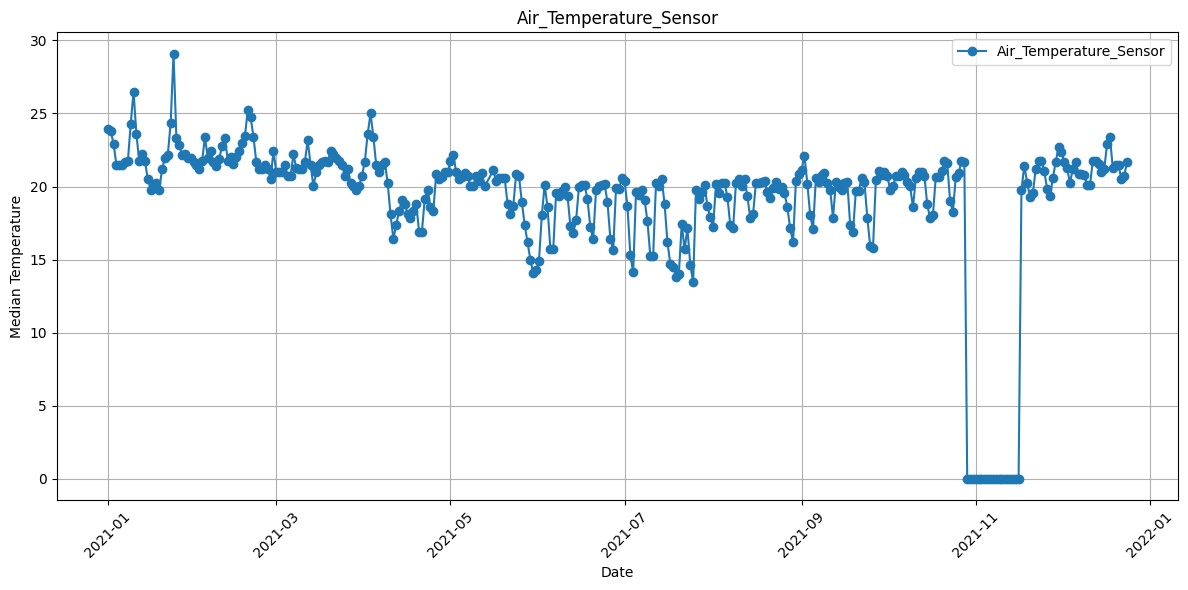

Air_Temperature_Sensor Conference_Room trainAll_8418.pkl
data_path='./datasets/train//trainAll_8418.pkl'


/tmp/ipykernel_18110/1773555815.py:7: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  data = pickle.load(file)


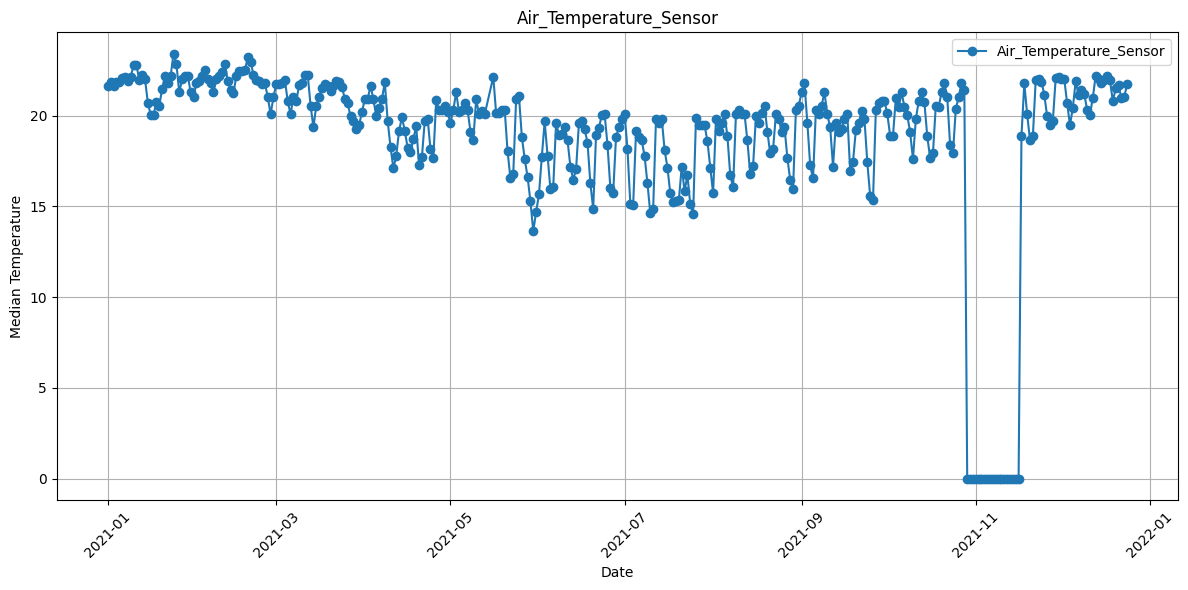

Air_Temperature_Sensor Conference_Room trainAll_8067.pkl
data_path='./datasets/train//trainAll_8067.pkl'


/tmp/ipykernel_18110/1773555815.py:7: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  data = pickle.load(file)


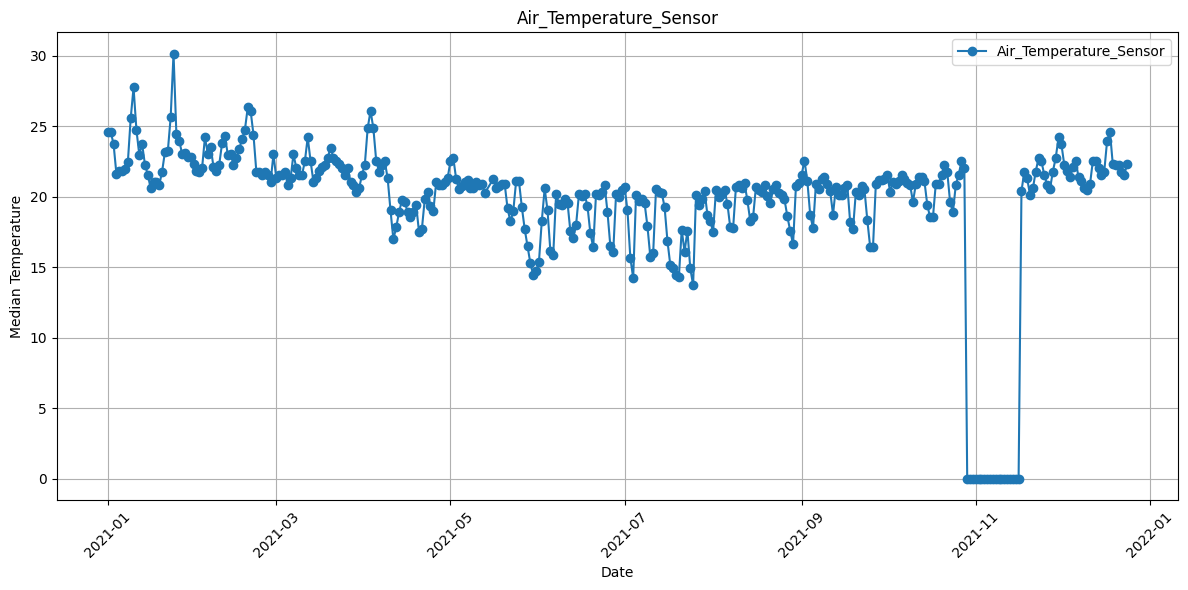

Air_Temperature_Sensor Conference_Room trainAll_8047.pkl
data_path='./datasets/train//trainAll_8047.pkl'


/tmp/ipykernel_18110/1773555815.py:7: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  data = pickle.load(file)


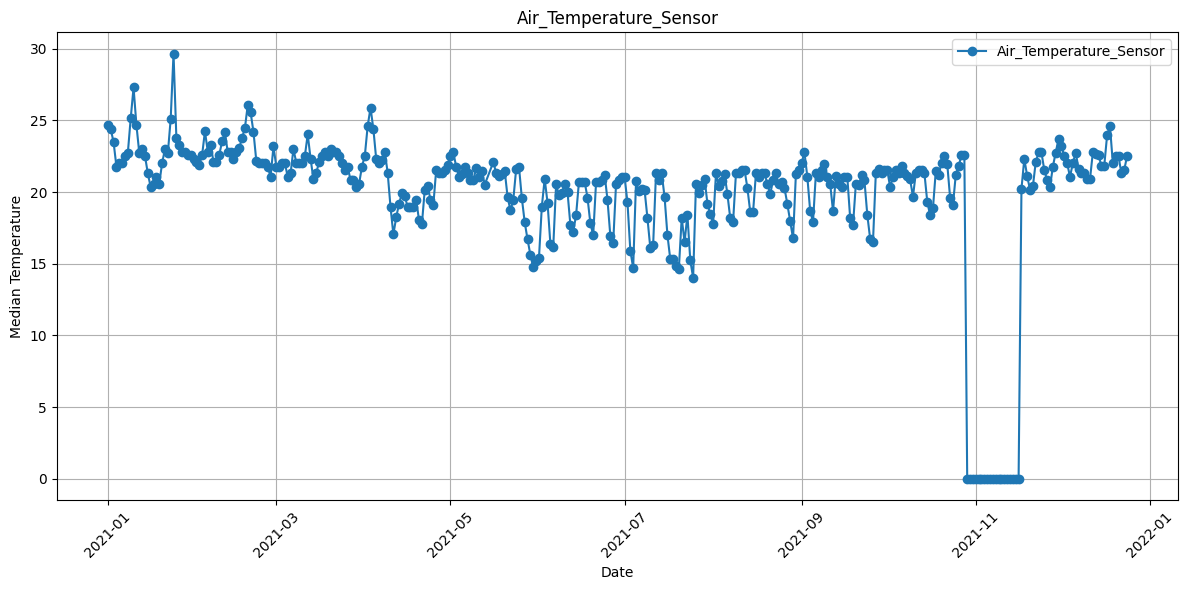

Air_Temperature_Sensor Conference_Room trainAll_8468.pkl
data_path='./datasets/train//trainAll_8468.pkl'


/tmp/ipykernel_18110/1773555815.py:7: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  data = pickle.load(file)


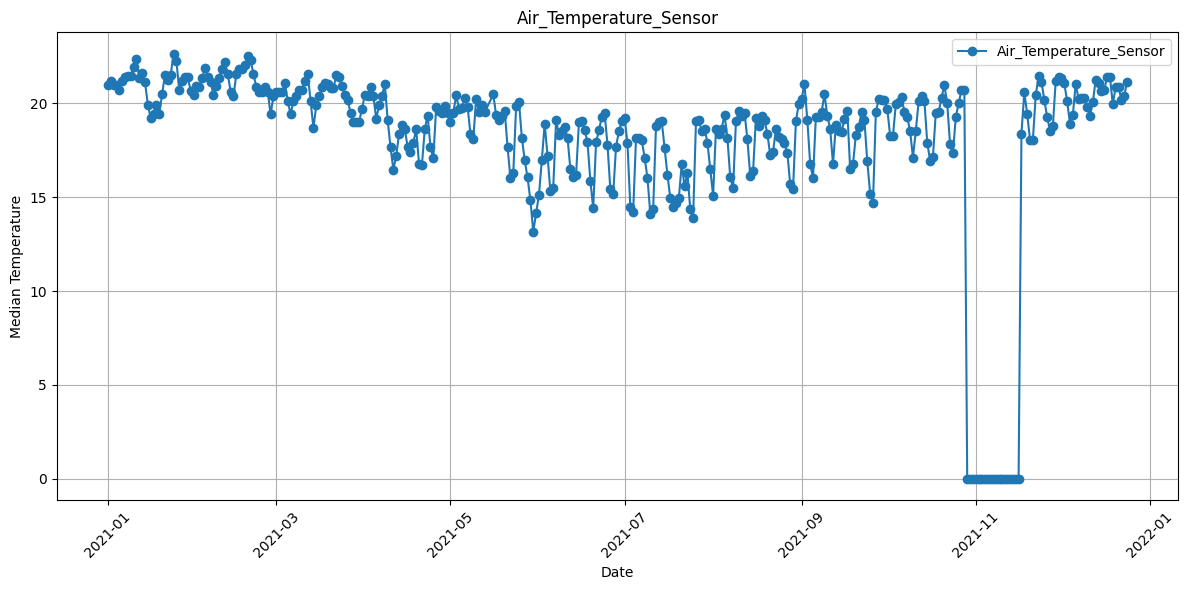

Air_Temperature_Sensor Conference_Room trainAll_8443.pkl
data_path='./datasets/train//trainAll_8443.pkl'


/tmp/ipykernel_18110/1773555815.py:7: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  data = pickle.load(file)


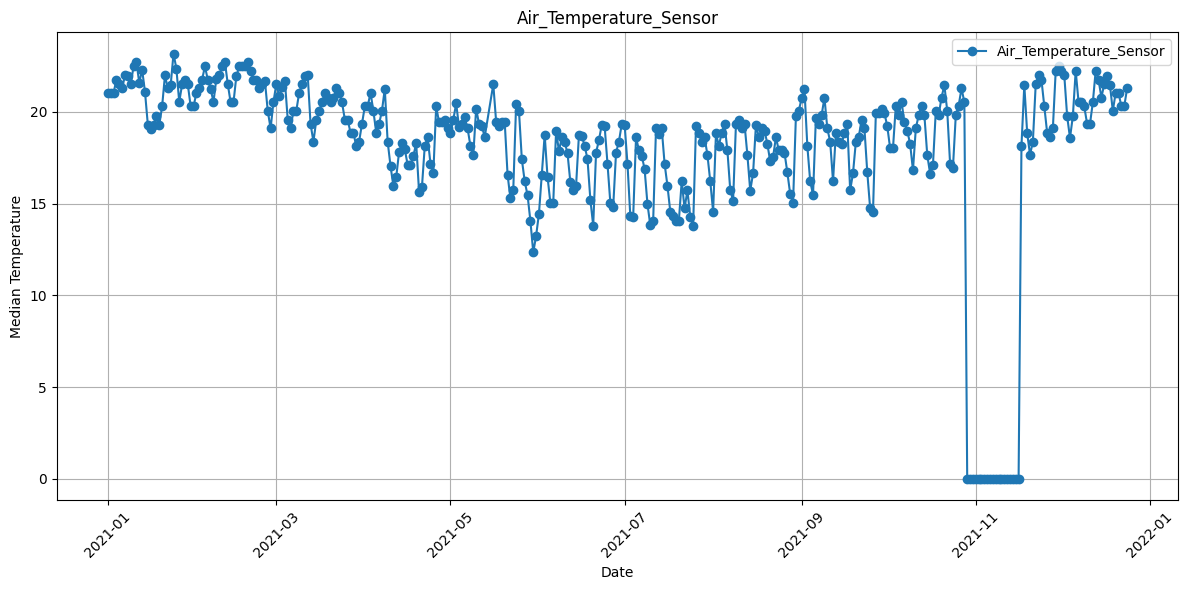

Air_Temperature_Sensor Conference_Room trainAll_8087.pkl
data_path='./datasets/train//trainAll_8087.pkl'


/tmp/ipykernel_18110/1773555815.py:7: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  data = pickle.load(file)


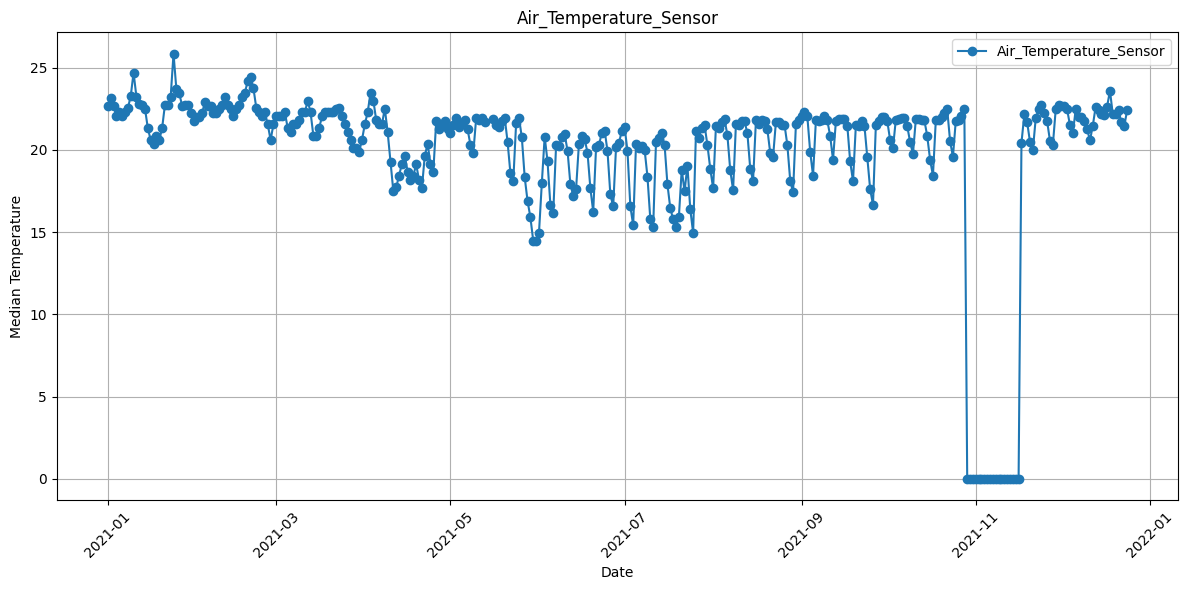

Air_Temperature_Sensor Conference_Room trainAll_8127.pkl
data_path='./datasets/train//trainAll_8127.pkl'


/tmp/ipykernel_18110/1773555815.py:7: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  data = pickle.load(file)


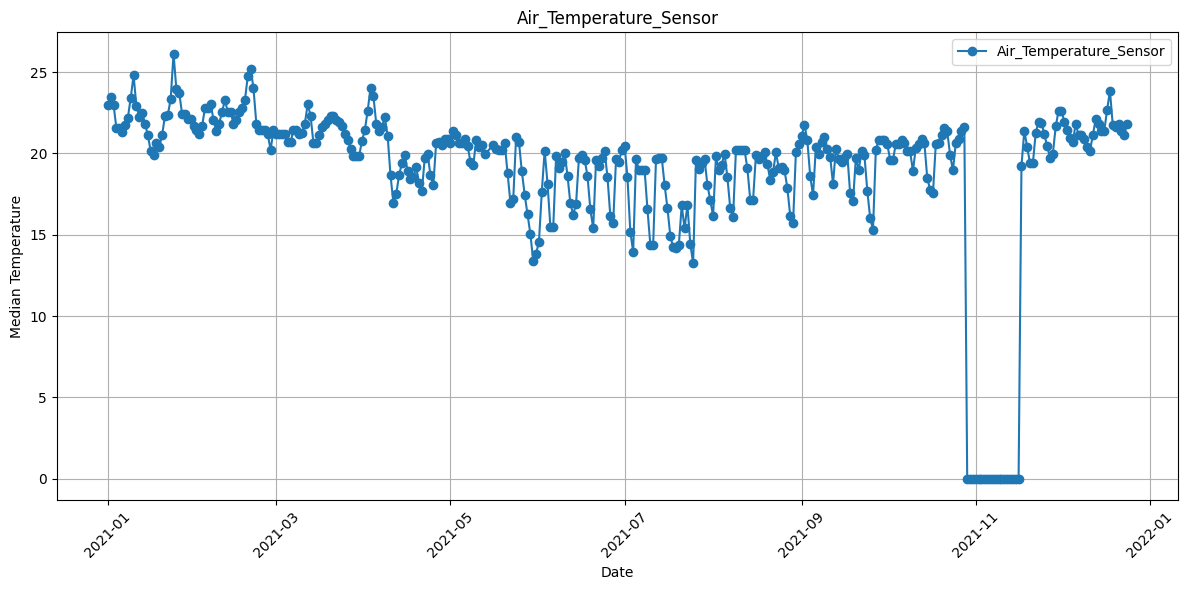

Air_Temperature_Sensor Conference_Room trainAll_8107.pkl
data_path='./datasets/train//trainAll_8107.pkl'


/tmp/ipykernel_18110/1773555815.py:7: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  data = pickle.load(file)


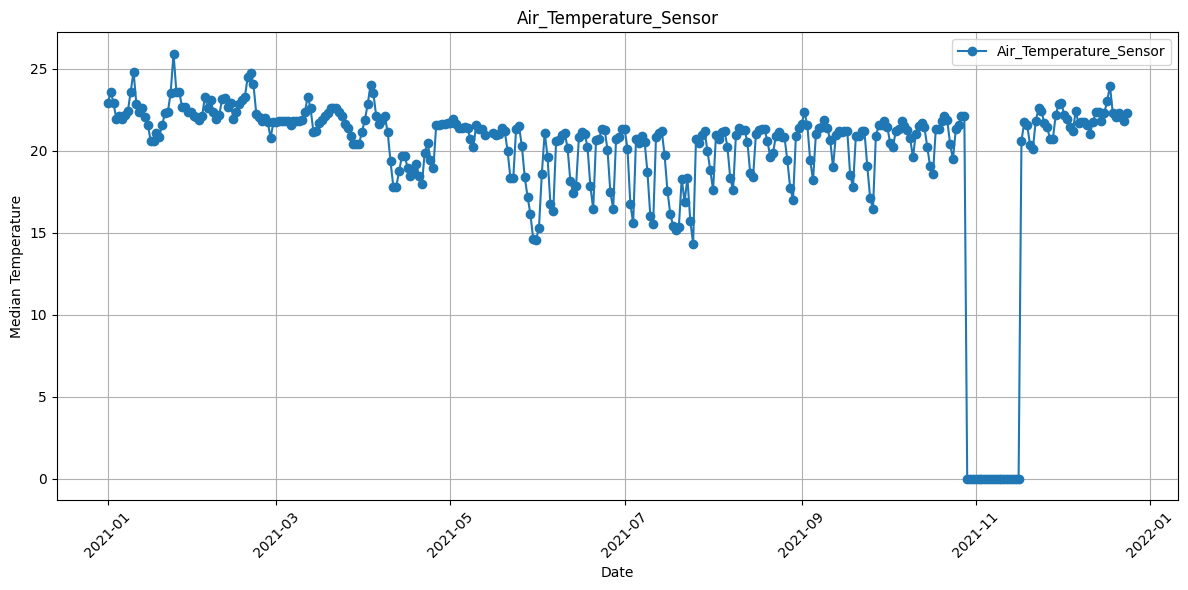

Air_Temperature_Sensor Conference_Room trainAll_8007.pkl
data_path='./datasets/train//trainAll_8007.pkl'


/tmp/ipykernel_18110/1773555815.py:7: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  data = pickle.load(file)


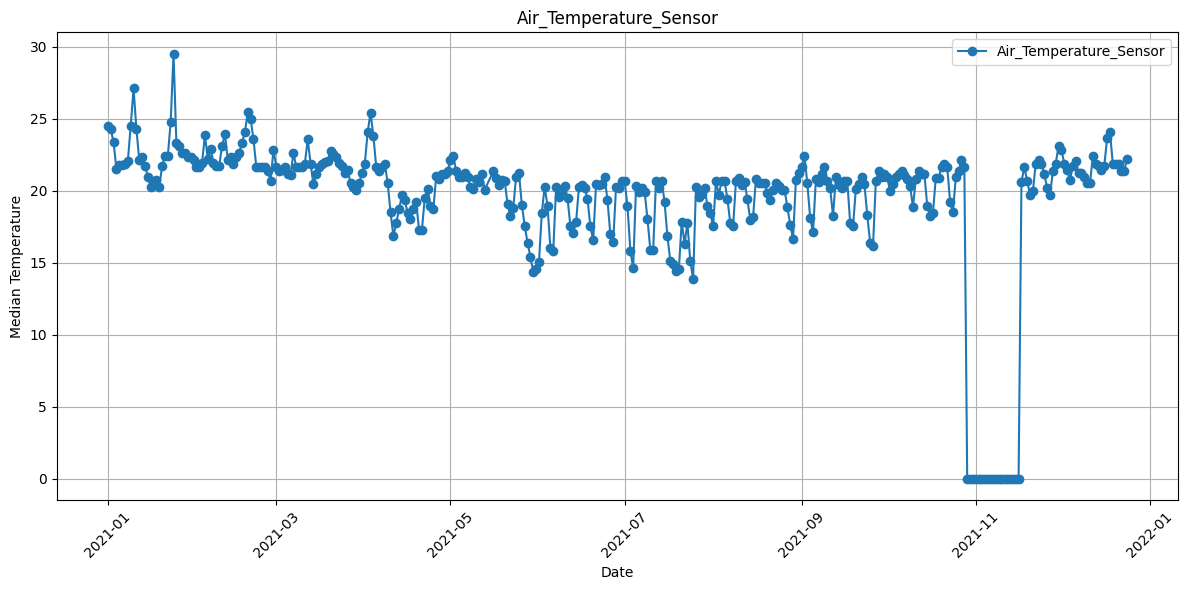

Air_Temperature_Sensor Conference_Room trainAll_8147.pkl
data_path='./datasets/train//trainAll_8147.pkl'


/tmp/ipykernel_18110/1773555815.py:7: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  data = pickle.load(file)


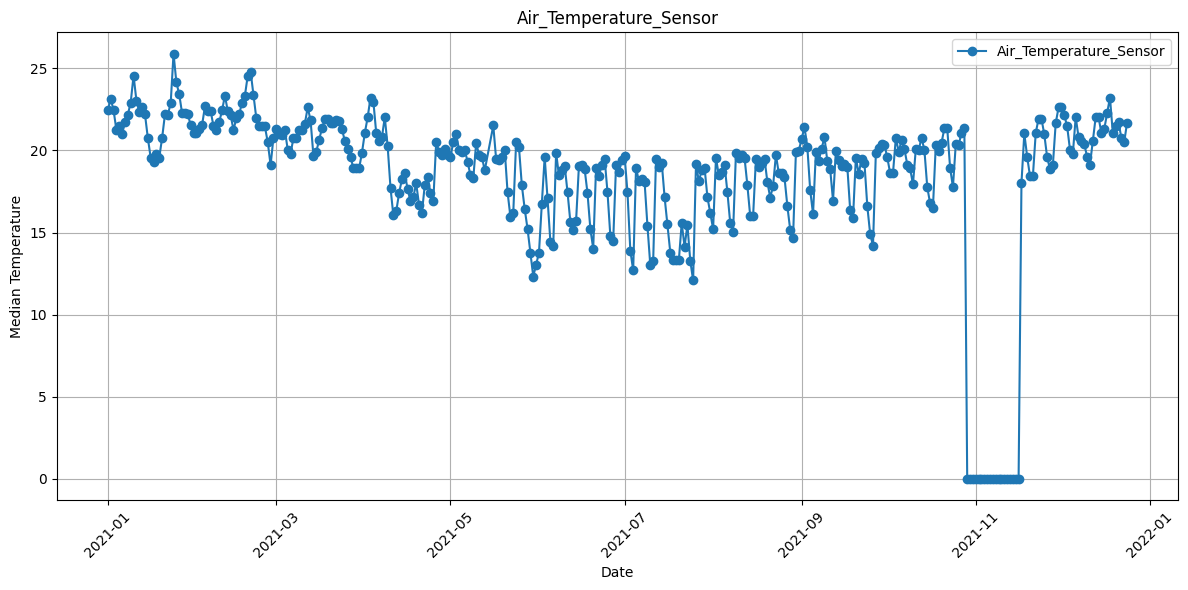

In [13]:
# Iterate over each row and plot
for index, row in df_conference_mapping.iterrows():
    print(row['Type'], row['Entity.EntityType.1'], row['Filename'])
    data_path = f"{train_file_path}/{row['Filename']}"
    print(f"{data_path=}")
    with open(data_path, 'rb') as file:
        data = pickle.load(file)
        
    # Now 'data' contains the object stored in the .pkl file
    df = pd.DataFrame(data)
    df.columns = ['dt','value', 'sensor']
    get_conference_room_temp(df, row['Type'])
    
